# Práctica Final por Equipos

### Equipo 5
- Ita Santiago
- Mario Hernandez
- José Reyes 


In [19]:
from data_cleaning import *
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
directorio = os.getcwd()
df_raw=pd.read_csv(directorio+"\\Video_Games_Sales_as_at_22_Dec_2016.csv")

### Introducción

El objetivo de esta trabajo es presentar los resultados análisis de ventas de videojuegos así como una descripción de todo el proceso. Se describirá a detalle, la base de datos utilizada así como un análisis exploratorio inicial para facilitar la limpieza y tratamiento de los datos. Además **llenar aqui con las otras secciones**. También se incluirá una descripción de los paquetes y funciones utilizadas para este trabajo.

### Base de datos y análsis exploratorio inicial

Para este análisis, utilizamos una [base de datos](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings?select=Video_Games_Sales_as_at_22_Dec_2016.csv) de ventas de videojuegos a diciembre de 2016. Esta base de datos se obtuvo de Kaggle del usuario [Rush Kirubi](https://www.kaggle.com/rush4ratio). La base de datos se descargó de forma local en formato csv convirtió a dataframe para su análisis.


La base de datos contiene el nombre del videojuego, año de lanzamiento, plataforma, género, rating y creador. Además contiene sus ventas por region, y calificación de críticos y usuarios. Cada renglon de la base de datos representa una observación. Las columnas del dataframe son:

In [5]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


En esta primera fase, fue necesario explorar los datos para asegurar que pudiera realizarse un analisis estadístico correctamente. Esta fase incluyo revisar lo siguiente:
- Variables  del tipo correcto
- Valores faltantes (nan/None)
- Presencia de datos atípicos
- Revisar las categorías de las variables categóricas. 

El resultado de la revisión de tipo de variables fue el siguiente:

In [12]:
df_raw.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Notamos una inconsistencia en la variable User_Score, se registó como object en cuando debería ser float64. Observamos los valores que toma esta variabe y notamos que existe una observación "tbd", por lo que debe ser sustituida por nan para que pueda ser procesada correctamente como variable float.

In [13]:
df_raw.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Después se revisó la presencia de valores faltantes. Se encontró que 2 observaciones no tenían nombre y que 269 no tenían año de publicación. Se decidió que estas dos variables eran fundamentales, por lo que se debían eliminar las observaciones que no contaran con estos datos. 

In [17]:
print("Antes")
print(df_raw.isna().sum())


Antes
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [16]:
print("Después")
print(df.isna().sum())

Después
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
Critic_Count       8465
User_Score         8985
User_Count         8985
Developer          6541
Rating             6679
dtype: int64


También fue necesario revisar que las variables númericas se encontraran dentro de los rangos permitidos. Las variables númericas son:
           
          'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'
       
Para buscar datos atípicos en 'Critic_Score' y 'User_Score' se utilizó una gráfica box-plot. Primero identificamos el rango de las variables, en el caso de 'Critic_Score' era de 0 a 100 mientras que en 'User_Score' fue de 0-10. Se decidió homologar ambas esclalas al transformar 'User-Score' multiplicandola por 10. De esta forma ambos box-plots tendrían el mismo rango de valores. 



[Text(0, 0, 'User Score')]

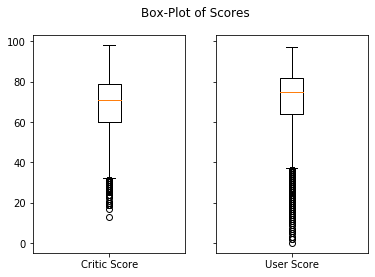

In [23]:
fig1,axs=plt.subplots(1,2,sharey=True)
fig1.suptitle("Box-Plot of Scores")
axs[0].boxplot(df.Critic_Score[~np.isnan(df.Critic_Score)])
axs[0].set_xticklabels(["Critic Score"])
axs[1].boxplot(df.User_Score[~np.isnan(df.User_Score)])
axs[1].set_xticklabels(["User Score"])


Las gráficas muestran no hay valores fuera del rango permitido. Notamos que muchos datos se encuentran dispersos en el primer cuartil, sin embargo no podriamos considerarlos valores atípicos por errores de medición/captura ya que están dentro del rango de calificación permitido. Para el resto de las variables, se utilizó el método describe de Pandas. 


In [24]:
df_summary

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,7463.000000
mean,2006.488996,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,163.015141
std,5.877470,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.53000,98.000000,113.000000,10665.000000


La tabla anterior nos da información similar a la de un box-plot. Para las variables de ventas y count, los valores mínimos y máximos se encuentran dentro de valores realistas. Además, destaca una gran diferencia entre el valor del tercer cuartil y el valor máximo. Esta diferencia puede ser atribuida a que existen algunos juegos muy populares que generan muchas ventas y atraen a más usuarios y críticos. A pesar de tener valores atípicos, es muy poco probable que sean atribuidos a errores de medición o de captura. 

Por último, se revisaron los factores de las variables categoricas, buscando que los valores no estuvieran duplicados o con algún error. En este caso no fue necesaria ninguna modificación.

In [42]:
for i in cat_data_counts.values():
    print(i.head(n=5))

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
Name: Platform, dtype: int64
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: Year_of_Release, dtype: int64
Action          3308
Sports          2306
Misc            1721
Role-Playing    1483
Shooter         1296
Name: Genre, dtype: int64
Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
Name: Publisher, dtype: int64
E       3922
T       2905
M       1536
E10+    1393
EC         8
Name: Rating, dtype: int64


Tras revisar todas estas carácteristicas, la base de datos podría ser utilizada para un analisis estadístico mas profundo.

#### Paquetes Utilizados

Para esta sección, se utilizaron principalmente dos paquetes, [Pandas](https://pandas.pydata.org/docs/) y [Matplotlib](https://matplotlib.org/3.2.1/contents.html). Pandas es un paquete que permite trabajar con estructuras de datos multidimensionales que pueden ser de forma tabular, ordenada o no ordenada, que incluyan observaciones y variables en renglones y columnas. Este paquete permite trabajar con bases de datos y relacionarlas entre sí, por medio de índices. La estructura de datos utilizada para trabajar en nuestro proyecto fue el Dataframe, que es una estructura en dos dimensiones donde cada fila representa una observación y cada columna una variable. Pandas permite manipular estos objetos de forma amigable por lo que se vuelve una herramienta muy útil para la ciencia de datos. En esta sección, se utilizaron múltiples funciones y métodos asociados a los objetos de pandas. Iniciando con la importación de los datos de un formato csv con la función <pd.read_csv()> que permitió leer la base de datos original y almacenarla en un objeto DataFrame. Después con los métodos <.isnan()> y <.sum()>; su uso en conjunto permitió identificar el número de valores faltantes en la base de datos y poder tomar una decisión sobre qué hacer con esas observaciones. Fácilmente se eliminaron con el méthodo <.dropna()> aplicado únicamente sobre columnas específicas. Los otros métodos que permitieron verificar que la base de base de datos estuviera correcta fueron <.unique()> y <.value_counts()>. Ambas permiten eliminar la repetición de los valores que toman las observaciones y determinar si alguno de ellos tiene algún error. Por último, Pandas también permite transformar las variables fácilmente el método de <.transform()>; en este caso se utilizó para reescalar la variable 'User_Score'. Para auxiliar en la identificación de posibles datos atípicos, el método <.describe()> indica los principales estadísticos de interés, incluyendo media, desviación estándar, valores mínimo y máximo y cuartiles. 


Además de hacer la revisión usando la librería de Pandas, se utilizó Matplotlib para una revisión visual. Matplotlib es una librería que permite visualizar y graficar los datos de una forma sencilla. Es posible generar gráficos con pocas líneas de código y manipular todas las variables de su diseño. Para este proyecto, se utilizó para generar un gráfico de box-plot de las variables de 'User-Score' y 'Critic_Score'. Se creó un objeto tipo <figure> y <Axis> que contienen dos _subplots_ orientados en dos columnas. Con el método <.suptitle()> sobre la figura se le agrega facilmente un título para ambas gráficas. La librería cuenta con diferentes tipos de gráficas, en este caso fue un <.boxplot()> y es un método que afecta a cada uno de los _subplots_. Modificando sus propuedades con <.set_xticklabels()> es posible asignarle un título al eje en cada gráfico. 

    
Ambos paquetes son ampliamente utilizados en la ciencia de datos y en este caso, facilitaron el trabajo de descarga y limpieza de la base de datos. 